## **Practical 5**: KNN implementation with different values of K

Overviewing and loading iris dataset

In [2]:
from sklearn import datasets, metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

#loading dataset
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


In [3]:
X,y = datasets.load_iris(return_X_y = True) 

X_train = X[range(1,150,2),:]
y_train = y[range(1,150,2)]

#print(y_train.shape)
#print(X_train.shape)

X_test = X[range(0,150,2),:]
y_test = y[range(0,150,2)]

#Uniformly Weighted:-

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#Uniform weighted
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Y-pred : ",y_pred)
print("Y-test : ",y_test)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))



Y-pred :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]
Y-test :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]

Confusion Matrix: 
 [[25  0  0]
 [ 0 24  1]
 [ 0  1 24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        25

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



Calculating error for K values between 1 and 70

In [10]:
error = []

# Calculating error for K values between 1 and 70
for i in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    #print(np.mean(pred_i != y_test))
    #print(np.mean(pred_i == y_test))

#Distance weighted KNN

In [ ]:
#distance weighted
classifier_d = KNeighborsClassifier(n_neighbors=5, weights='distance')
classifier_d.fit(X_train, y_train)
y_pred = classifier_d.predict(X_test)
print("Y-pred : ",y_pred)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))


Y-pred :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]

Confusion Matrix: 
 [[25  0  0]
 [ 0 23  2]
 [ 0  1 24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.92      0.94        25
           2       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Calculating error for K values between 1 and 70

In [ ]:
error_d = []

# Calculating error for K values between 1 and 70
for i in range(1, 70):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_d.append(np.mean(pred_i != y_test))

# Plotting to analyse the variation in Uniformly and Distance Weighted KNN

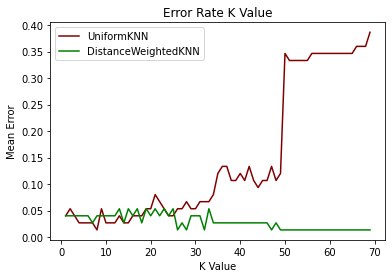

In [ ]:
plt.plot(range(1, 70), error, color='maroon', label = 'UniformKNN')
plt.plot(range(1, 70), error_d, color='green', label = 'DistanceWeightedKNN')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
leg = plt.legend()

Conclusion:

As the number of nearest neighbours, k, increases,  the mean error :-

1) Increases for Uniform weighted KNN, because it just considers the maximum vote count class, among all the neighbours, and assigns that

2) Decreases in case of Distance weighted KNN, because it considers the distance of the nearest neighbours and sums it up to conclude the class of the sample, which is definitely more accurate. More the distance, less is the similarity to that particular class